# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [6]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Add Year, Date, and Converted Date columns
stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

In [2]:
stocks_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0,2006,732456
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0,2006,732457
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0,2006,732461
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0,2006,732462
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0,2006,732463


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

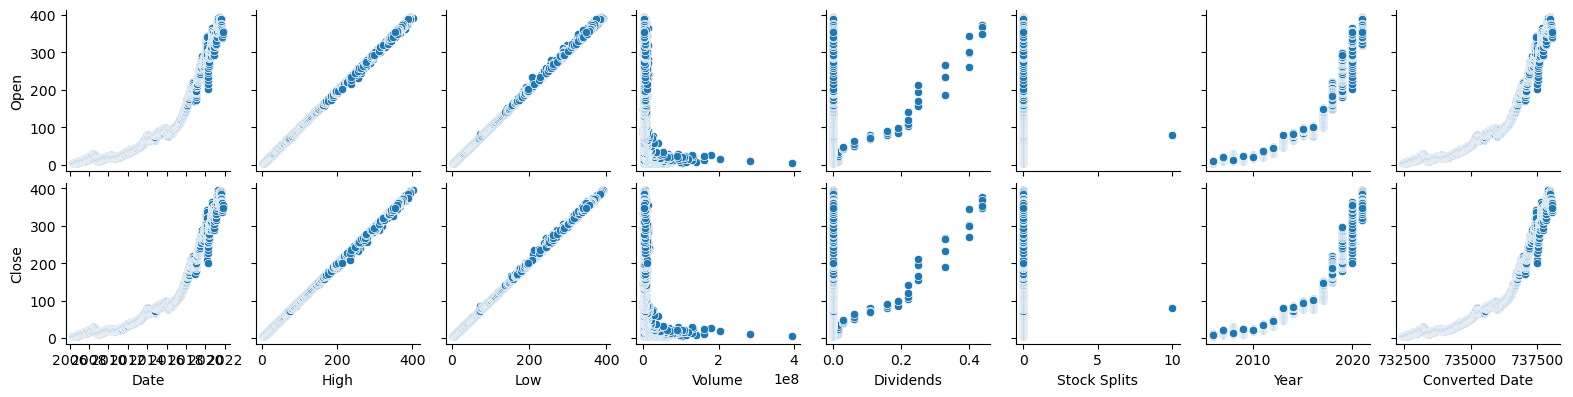

In [11]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(stocks_df, x_vars=['Date', 'High','Low','Volume', 'Dividends', 'Stock Splits', 'Year', 'Converted Date'], 
             y_vars=['Open','Close'], size = 2, aspect=1, kind='scatter')
plt.show()

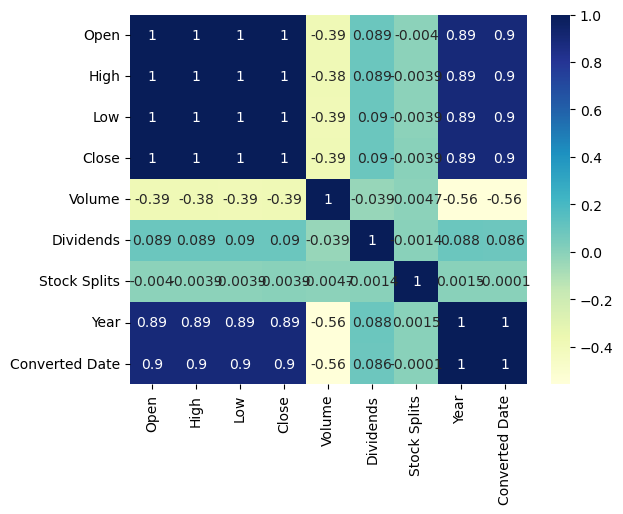

In [12]:
# Visualizing the data using heatmap
sns.heatmap(stocks_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [13]:
# Step 1 is to assign your x and y

x = stocks_df['Converted Date']
y = stocks_df['Open']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [14]:
# Step 2 is to create your train and test sets
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
# Take a look at the train dataset
print('x-train sets')
print(X_train)
print('y-train sets')
y_train

x-train sets
2457    736024
1540    734690
384     733014
2560    736172
3320    737276
         ...  
1930    735260
79      732572
1859    735155
2840    736578
1544    734696
Name: Converted Date, Length: 2710, dtype: int64
y-train sets


2457     84.777597
1540     41.789692
384      18.706097
2560     90.718854
3320    257.031441
           ...    
1930     75.228260
79        6.115560
1859     64.653030
2840    129.994696
1544     39.422718
Name: Open, Length: 2710, dtype: float64

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [16]:
# Step 3 is to build the model. Remember to import any libraries you may need
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const            -43485.797720
Converted Date        0.059287
dtype: float64

In [17]:
# Performing a summary to list out all the different parameters of the regression line fitted
# The coefficient for Converted Date is 0.0593
#The corresponding p-value is very low which means it is statistically significant
# The R-squared value is 0.807 which means that 80.7% of the Open 'sales' variance can be explained by Converted Date column using
#this line
#Prob F-statistics has a very low p-value, practically zero, which gives us that the model fit is
#statistically significant
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:29:34   Log-Likelihood:                -14299.
No. Observations:                2710   AIC:                         2.860e+04
Df Residuals:                    2708   BIC:                         2.861e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.349e+04    410.098   -106.038      0.000   -4.43e+04   -4.27e+04
Converted Date     0.0593      0.001    106.299      0.000       0.058       0.060
==============================================================================
Omnibus:                      293.654   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.012
Skew:                           0.523   Prob(JB):                     1.49e-41
Kurtosis:                       2.245   Cond. No.                     3.31e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

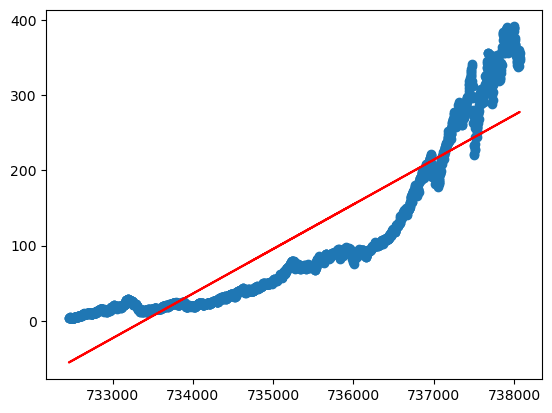

In [20]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -43490 + 0.0593*X_train, 'r')
plt.show()

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

In [21]:
# Step 4 is to perform residual analysis

# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

Now plot the residuals. Did you get a bell curve?

No I did not get the normal distribution bell curve

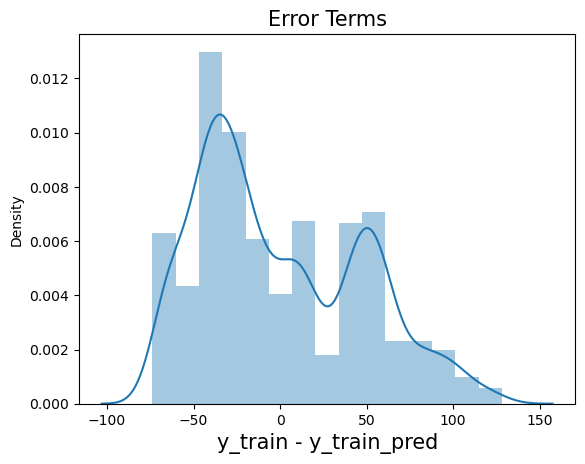

In [22]:
# Plotting the histogram using the residual values
#The residuals do show a normal distribution with a mean of zero
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold? 
    
    My R squared value for the predictor IV (Converted Date) was 0.807 which is higher than the threshold
2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 

    I do not recommend the linear regression because the residual do not show a normal distribution. 
    From the pair plot it appears that that data might be exponentially correlated rather than a straight line